# **Facial Expressions Saturdays Ai**

Proyecto de la primera edición de Donostia de Saturdays Ai 2020.


1. Importación de librerías

In [3]:
import numpy as np 
import pandas as pd
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
print(tf.version.VERSION)

2.4.0


2. Importación data training

In [5]:
labels = []

for i in os.listdir('data/train/0'):
    labels.append(0)
for i in os.listdir('data/train/1'):
    labels.append(1)
for i in os.listdir('data/train/2'):
    labels.append(2)
for i in os.listdir('data/train/3'):
    labels.append(3)
for i in os.listdir('data/train/4'):
    labels.append(4)
for i in os.listdir('data/train/5'):
    labels.append(5)
for i in os.listdir('data/train/6'):
    labels.append(6)

In [6]:
#feature extraction on training data

loc1 = 'data/train/0'
loc2 = 'data/train/1'
loc3 = 'data/train/2'
loc4 = 'data/train/3'
loc5 = 'data/train/4'
loc6 = 'data/train/5'
loc7 = 'data/train/6'

features = []

for i in tqdm(os.listdir(loc1)):
    features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 4965/4965 [00:00<00:00, 9099.64it/s]


In [7]:
labels_test = []
for i in os.listdir('data/test/0'):
    labels_test.append(0)
for i in os.listdir('data/test/1'):
    labels_test.append(1)
for i in os.listdir('data/test/2'):
    labels_test.append(2)
for i in os.listdir('data/test/3'):
    labels_test.append(3)
for i in os.listdir('data/test/4'):
    labels_test.append(4)
for i in os.listdir('data/test/5'):
    labels_test.append(5)
for i in os.listdir('data/test/6'):
    labels_test.append(6)

In [8]:
#feature extraction on testing data

loc1 = 'data/test/0'
loc2 = 'data/test/1'
loc3 = 'data/test/2'
loc4 = 'data/test/3'
loc5 = 'data/test/4'
loc6 = 'data/test/5'
loc7 = 'data/test/6'

test_features = []

for i in tqdm(os.listdir(loc1)):
    test_features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    test_features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    test_features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    test_features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    test_features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    test_features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    test_features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 626/626 [00:00<00:00, 9147.50it/s]


In [9]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

In [10]:
train_data['emotion'] = labels
train_data['pixel_values'] = features
test_data['emotion'] = labels_test
test_data['pixel_values'] = test_features

In [11]:
test_data.head()

,emotion,pixel_values
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 11, 36, ..."
1,0,"[[90, 117, 158, 162, 157, 156, 164, 168, 171, ..."
2,0,"[[9, 9, 12, 23, 41, 67, 96, 118, 128, 139, 147..."
3,0,"[[35, 37, 41, 37, 26, 85, 134, 125, 158, 184, ..."
4,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 254,..."


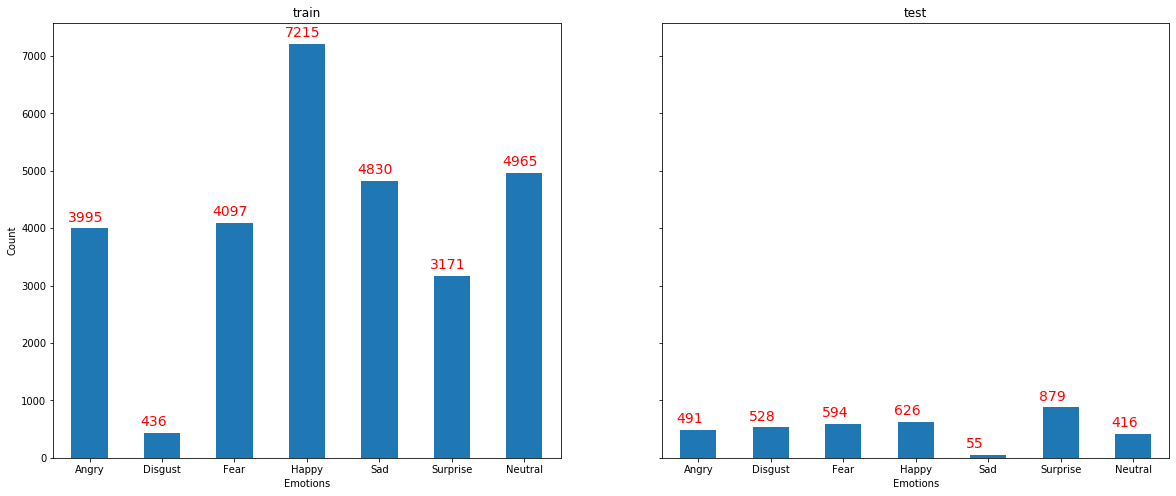

In [12]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe,df,title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)
    
    # set individual bar lables using above list
    for i in axe.patches:
         axe.text(i.get_x()-.05, i.get_height()+120, \
                str(round((i.get_height()), 2)), fontsize=14, color='red',
                    rotation=0)

import matplotlib.pyplot as plt   
fig, axes = plt.subplots(1,2, figsize=(20,8), sharey=True)
setup_axe(axes[0],train_data,'train')
setup_axe(axes[1],test_data,'test')
plt.show()

In [13]:
features = np.array(features).reshape(-1,48,48,1)
test_features = np.array(test_features).reshape(-1,48,48,1)

features = features/255
test_features = test_features/255

labels = np_utils.to_categorical(labels)
labels_test =np_utils.to_categorical(labels_test)

In [14]:
print('Training features shape ',features.shape)
print('Training labels shape',labels.shape)
print('Testing features shape ',test_features.shape)
print('Testing labels shape',labels_test.shape)

Training features shape  (28709, 48, 48, 1)
Training labels shape (28709, 7)
Testing features shape  (3589, 48, 48, 1)
Testing labels shape (3589, 7)


In [15]:
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop

In [16]:
def create_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    return model

In [17]:
model = create_model()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [17]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 
                                                 verbose=1)

In [62]:
model.save_weights(checkpoint_path.format(epoch=0))

In [80]:
model.fit(x=features, 
            y=labels,
            epochs=10, 
            steps_per_epoch = len(features)/64,
            verbose=1, 
            callbacks = [cp_callback],
            validation_data=(test_features,labels_test),  
            validation_steps = len(test_features)/64)


Epoch 1/10
448/448 [==============================] - 1680s 4s/step - loss: 1.8558 - accuracy: 0.2823 - val_loss: 1.4940 - val_accuracy: 0.4232

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
  3/448 [..............................] - ETA: 26:45 - loss: 1.3290 - accuracy: 0.4965

KeyboardInterrupt: 

In [81]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)

In [83]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model.fit(x=features, 
            y=labels,
            epochs=10, 
            steps_per_epoch = len(features)/64,
            verbose=1, 
            callbacks = [cp_callback],
            validation_data=(test_features,labels_test),  
            validation_steps = len(test_features)/64)

Epoch 1/10
448/448 [==============================] - 1660s 4s/step - loss: 1.3015 - accuracy: 0.5008 - val_loss: 1.3649 - val_accuracy: 0.4756

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
448/448 [==============================] - 2488s 6s/step - loss: 1.1186 - accuracy: 0.5785 - val_loss: 1.2394 - val_accuracy: 0.5202

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
448/448 [==============================] - 6085s 14s/step - loss: 1.0066 - accuracy: 0.6275 - val_loss: 1.2103 - val_accuracy: 0.5403

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
448/448 [==============================] - 6210s 14s/step - loss: 0.8947 - accuracy: 0.6660 - val_loss: 1.3548 - val_accuracy: 0.5302

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
268/448 [================>.............] - ETA: 39:50 - loss: 0.7282 - accuracy: 0.7332

In [21]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)

In [22]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [23]:
model.fit(x=features, 
            y=labels,
            epochs=1, 
            steps_per_epoch = len(features)/64,
            verbose=1, 
            callbacks = [cp_callback],
            validation_data=(test_features,labels_test),  
            validation_steps = len(test_features)/64)

448/448 [==============================] - 6070s 14s/step - loss: 0.1220 - accuracy: 0.9602 - val_loss: 1.8791 - val_accuracy: 0.6035

Epoch 00001: saving model to training_1/cp.ckpt


In [24]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
from sklearn.externals import joblib 
joblib.dump(model, 'modelo_entrenado.pkl') 

In [25]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [26]:
loss, acc = new_model.evaluate(test_features, labels_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

113/113 - 45s - loss: 1.8791 - accuracy: 0.6035
Restored model, accuracy: 60.35%


In [27]:
test_true = np.argmax(labels_test, axis=1)
test_pred = np.argmax(model.predict(test_features), axis=1)
print("CNN Model Accuracy on testing data: {:.4f}".format(accuracy_score(test_true, test_pred)))

CNN Model Accuracy on testing data: 0.1733
